In [326]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# RMSE = Sqauare_Root(RSS)

# Understanding the Dataset

- Importing the dataset
- Understanding the Structure of Data

# Simple Linear Regression

In [327]:
data = pd.read_csv('./beauty.csv' , delimiter = ',' , nrows = 1260)
data.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [328]:
data.columns

Index(['wage', 'exper', 'union', 'goodhlth', 'black', 'female', 'married',
       'service', 'educ', 'looks'],
      dtype='object')

## As we are doing Simple Linear Regression so we will take only one input and one output feature

In [329]:
data = data[['wage','exper']]

In [330]:
data.head()

,wage,exper
0,5.73,30
1,4.28,28
2,7.96,35
3,11.57,38
4,11.42,27


In [331]:
data.describe()

,wage,exper
count,1260.000000,1260.000000
mean,6.306690,18.206349
std,4.660639,11.963485
min,1.020000,0.000000
25%,3.707500,8.000000
50%,5.300000,15.000000
75%,7.695000,27.000000
max,77.720000,48.000000


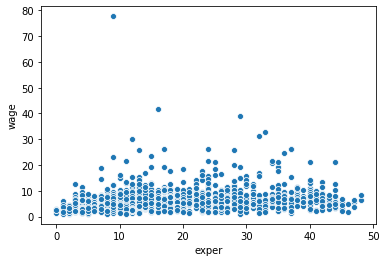

In [332]:
sns.scatterplot('exper','wage',data = data)

## Checking correlation between experience and wage

In [333]:
data.corr()['wage'][1]

0.23463221184551566

In [334]:
def wage_category(wage):
    if(wage <= 10):
        return "Low"
    if(wage <= 20):
        return "Medium"
    if(wage > 30):
        return "High"

In [335]:
data['Wage_Category'] = data['wage'].apply(wage_category)

In [337]:
data.head()

,wage,exper,Wage_Category
0,5.73,30,Low
1,4.28,28,Low
2,7.96,35,Low
3,11.57,38,Medium
4,11.42,27,Medium


In [338]:
data['Wage_Category'].value_counts()

Low       1108
Medium     128
High         5
Name: Wage_Category, dtype: int64

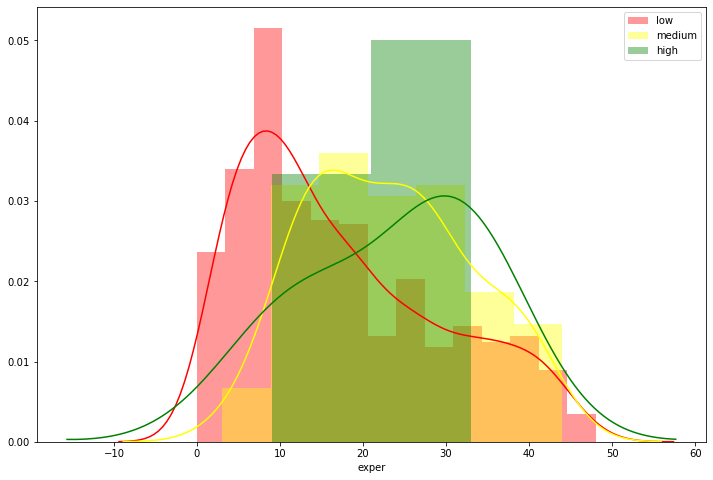

0.5660794118419409 -0.7473966209049849


In [339]:
plt.figure(figsize = (12,8))
sns.distplot(data[data.Wage_Category == 'Low']['exper'],color="red")
sns.distplot(data[data.Wage_Category == 'Medium']['exper'],color="yellow")
sns.distplot(data[data.Wage_Category == 'High']['exper'],color="green")
plt.legend(labels = ['low','medium','high'])
plt.show()
print(data['exper'].skew(), data['exper'].kurt())

## Preparing X and y

-  The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
-  However, X can be a dataframe as Pandas is built over NumPy.

In [277]:
X = data.exper

In [278]:
print(X.shape)
X.head()

(1260,)


0    30
1    28
2    35
3    38
4    27
Name: exper, dtype: int64

In [340]:
y = data.wage
y.head()

0     5.73
1     4.28
2     7.96
3    11.57
4    11.42
Name: wage, dtype: float64

x = 1,2,3,4,5
rs = 1
x = 2,4,1,2,5
rs = 2
x = 2,3,1,4,5
x_train = 2,4,1,2
x_test = 5

## Splitting Data into Training and Testing Sets

In [344]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9 , random_state=100)

In [345]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1134,)
(1134,)
(126,)
(126,)


Experience Salary
 4           5
 2           2 
x = [[4,5],[2,2]]
x = [1,2,3,4,5,5]
x = [[1],[2],[3]]

In [347]:

import numpy as np

X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [348]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1134, 1)
(1134,)
(126, 1)
(126,)


## Performing Linear Regression

In [352]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

In [353]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

4.640238827445763
[0.09722793]


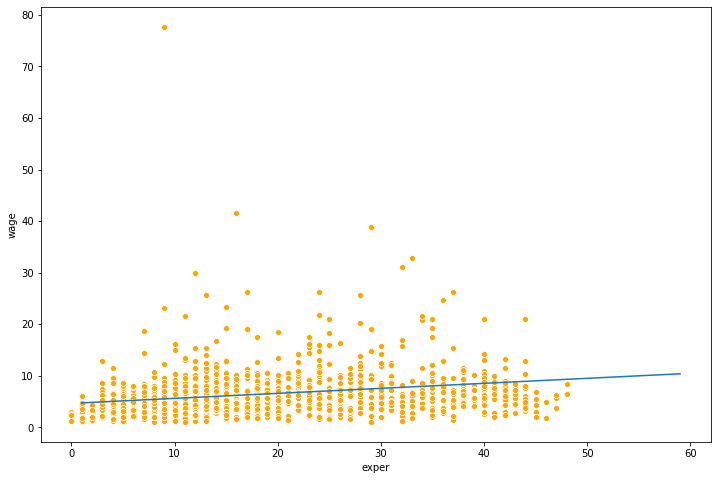

In [354]:
x = np.arange(1,60)
plt.figure(figsize = (12,8))
sns.scatterplot('exper','wage',data = data,color = 'orange')
plt.plot(x, lr.coef_*x + lr.intercept_)

In [355]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

In [356]:
type(y_pred)

numpy.ndarray

In [357]:
y_test.shape

(126,)

In [358]:
y_pred.shape

(126,)

Text(0, 0.5, 'Wage')

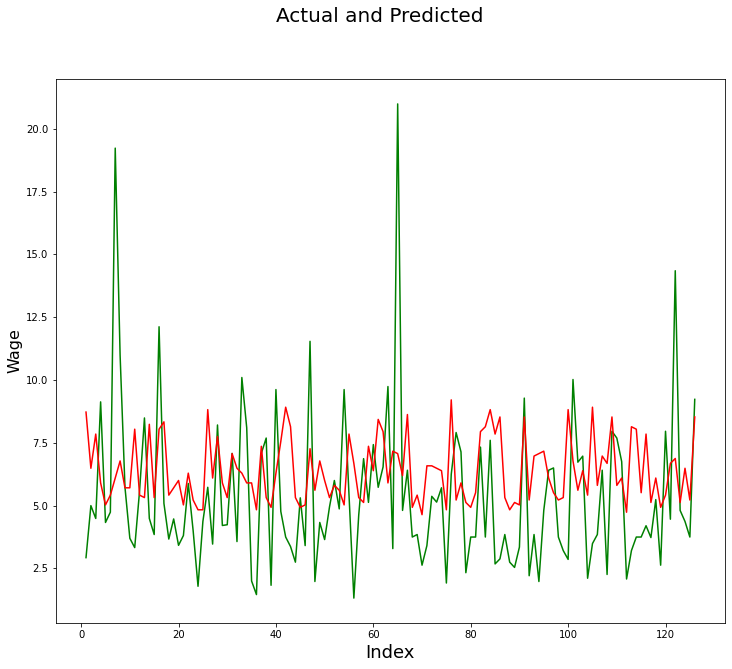

In [359]:

# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,127,1)]         # generating index 
fig = plt.figure(figsize = (12,10))
plt.plot(c,y_test, color="green", linewidth=1.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Wage', fontsize=16)                       # Y-label

## Visualizing the Absolute Error

Text(0, 0.5, 'ytest-ypred')

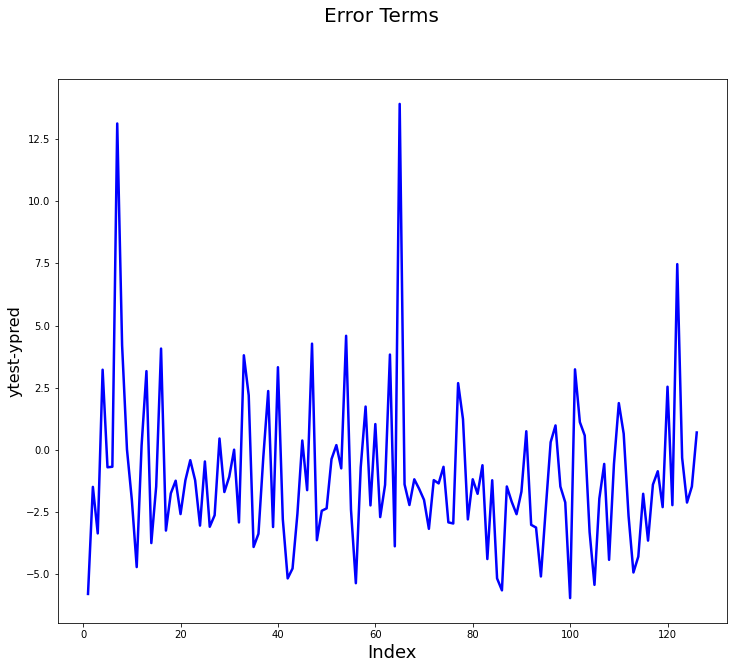

In [292]:
# Error terms
c = [i for i in range(1,127,1)]
fig = plt.figure(figsize = (12,10))
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

## Coefficients Calculation

In [293]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [294]:
r_squared = r2_score(y_test, y_pred)

In [295]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 10.698491139248762
r_square_value : -0.12444357787236737


Text(0, 0.5, 'Predicted Y')

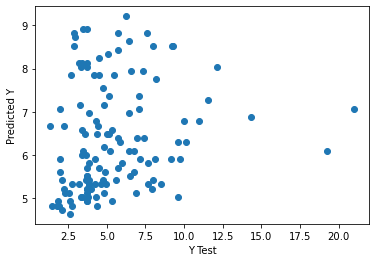

In [296]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Let's try to improve the accuracy by doing some transformation on data

In [360]:
data.head()

,wage,exper,Wage_Category
0,5.73,30,Low
1,4.28,28,Low
2,7.96,35,Low
3,11.57,38,Medium
4,11.42,27,Medium


4.8192044939496546 51.22120116313635


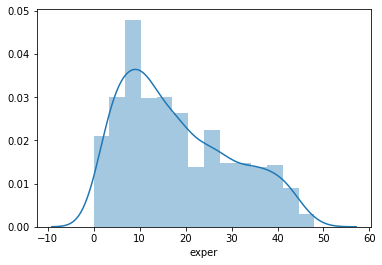

In [361]:
sns.distplot(data['exper'])
print(data['wage'].skew(),data['wage'].kurt())

4.8192044939496546 51.22120116313635


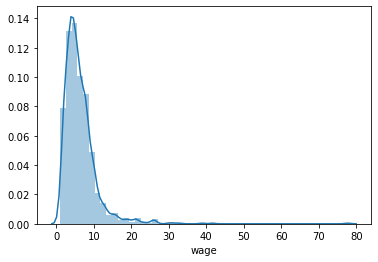

In [363]:
sns.distplot(data['wage'])
print(data['wage'].skew(),data['wage'].kurt())

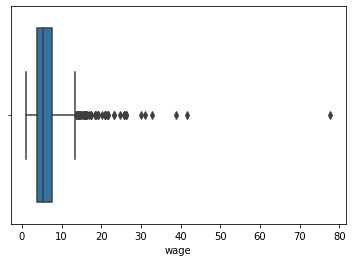

In [300]:
sns.boxplot(data.wage)

0.08333414095540731 0.43147165994423586


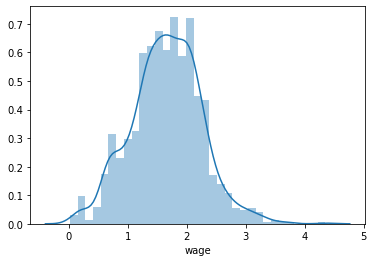

In [301]:
transformed_wage = np.log(data.wage)
sns.distplot(transformed_wage)
print(transformed_wage.skew(),transformed_wage.kurt())

In [302]:
X = data.exper
y = transformed_wage

print(X.shape,y.shape)

(1260,) (1260,)


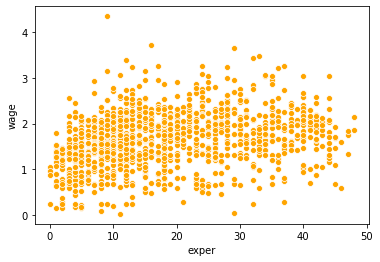

In [303]:
sns.scatterplot(X,y,color = 'orange')

In [304]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9 , random_state=100)

In [305]:
print(X_train.shape,X_test.shape)

(1134,) (126,)


In [306]:
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [307]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

In [308]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

1.3801153419742302
[0.01598964]


In [309]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

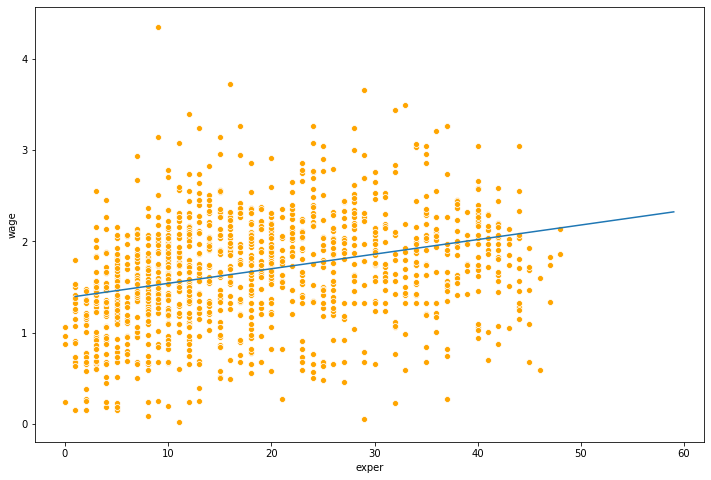

In [310]:
x = np.arange(1,60)
plt.figure(figsize = (12,8))
sns.scatterplot(X,y,color = 'orange')
plt.plot(x, lr.coef_*x + lr.intercept_)

Text(0, 0.5, 'Wage')

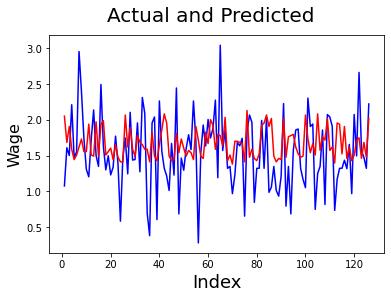

In [311]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,127,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=1.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Wage', fontsize=16)                       # Y-label

Text(0, 0.5, 'ytest-ypred')

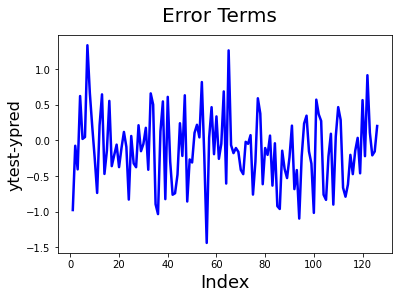

In [312]:
# Error terms
c = [i for i in range(1,127,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [313]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [314]:
r_squared = r2_score(y_test, y_pred)

In [315]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.2680238962717535
r_square_value : -0.03388522071171929


Text(0, 0.5, 'Predicted Y')

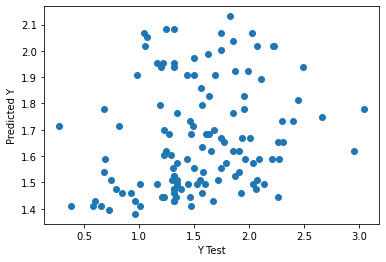

In [316]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')